In [156]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from itertools import cycle, islice
import matplotlib.colors as mcolors
from pylab import *
from numpy import outer
import seaborn as sns
import gmaps
from api_keys import g_key

In [176]:
# creating a dataframe with the vehicles info
cars_pd = pd.read_csv("../data/chicago-ridesharing-vehicles.csv")
cars_pd.head()

,REPORTED_YEAR,REPORTED_MONTH,STATE,MAKE,MODEL,COLOR,MODEL_YEAR,NUMBER_OF_TRIPS,MULTIPLE_TNPS
0,2015,3,IL,Toyota,Highlander,Black,2010,263,False
1,2015,3,IL,Toyota,Camry,Black,2008,204,False
2,2015,3,IL,Toyota,Camry,Black,2009,122,False
3,2015,3,IL,Mazda,Mazda3,Silver,2012,150,False
4,2015,3,IL,Chrysler,Pt Cruiser,White/Pearl,2008,208,False


In [158]:
# merging all mercedes info together
cars_pd['MAKE'] = cars_pd['MAKE'].replace(['Mercedesbenz','Mercedes','Mercedes Benz'],'Mercedes-Benz')

make1_df=cars_pd['MAKE'].value_counts()
make_df=make1_df.reset_index()

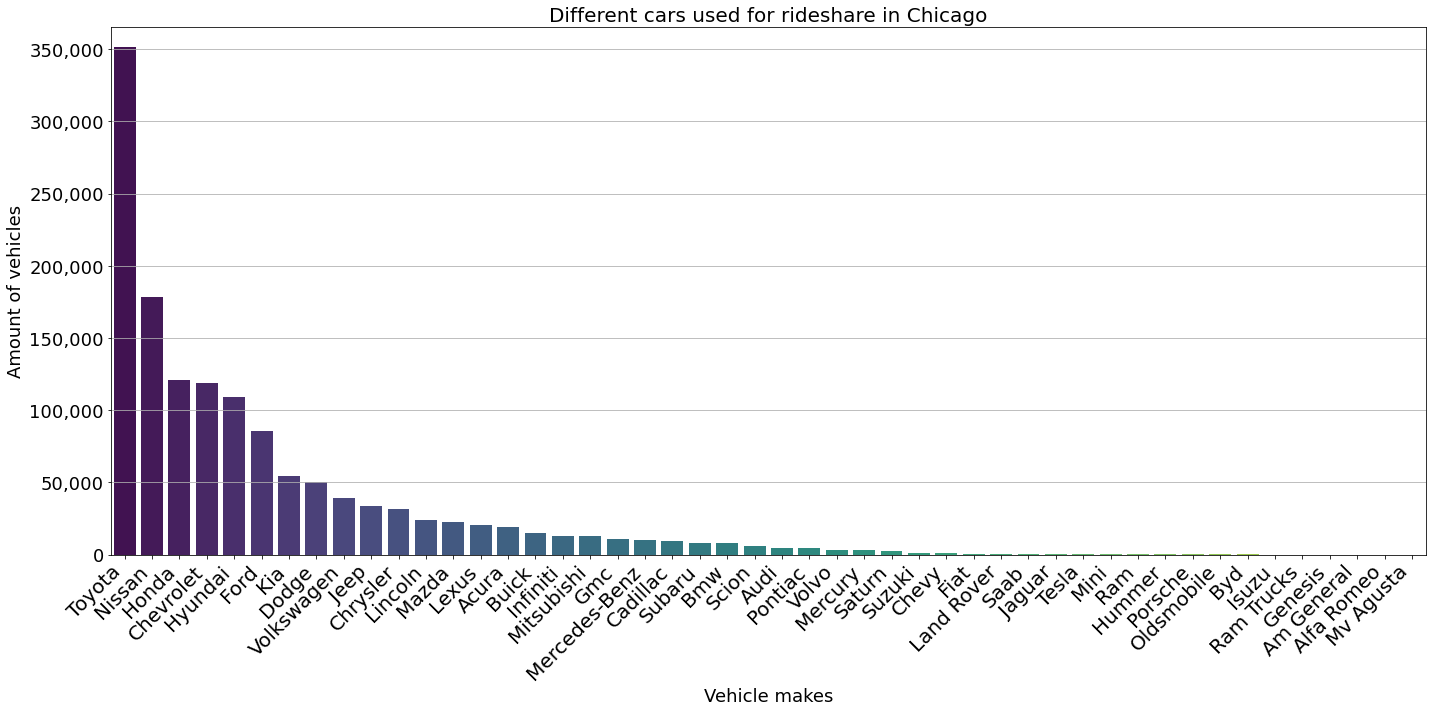

In [159]:
# plot for the most used make vehicles

fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(data=make_df,x='index', y='MAKE',palette='viridis')
ax.grid(axis='y')
plt.xticks(rotation=45, ha='right',fontsize=20)
plt.yticks(fontsize=18)
plt.ylabel('Amount of vehicles',fontsize=18)
plt.xlabel('Vehicle makes',fontsize=18)
plt.title('Different cars used for rideshare in Chicago',fontsize=20)
plt.ylim(top=365000)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.savefig('../resources/cars.png',facecolor='white')

In [48]:
# calculating the most used vehicles
most_common_car=cars_pd['MAKE'].value_counts().idxmax()
print(f"The mostly used vehicles are {most_common_car} = {make1_df.max()}")

The mostly used vehicles are Toyota = 351368


In [181]:
total_cars=len(cars_pd)
total_cars

1377583

In [160]:
# calculating how many times Tesla appeared
fun=cars_pd[cars_pd['MAKE']=='Tesla']
count=len(fun)

In [161]:
print(f"One of the most fun cars for a rideshare is Tesla with {count} appearances.")

One of the most fun cars for a rideshare is Tesla with 347 appearances.


In [163]:
# calculating the most common model
most_common_model=cars_pd['MODEL'].value_counts().idxmax()
model_df=cars_pd['MODEL'].value_counts()
amount_model=model_df.max()
# print(f"The mostly used model {most_common_car} is {most_common_model} = {amount_model}")

In [162]:
# dataframe for the top 20 models
bar_model=model_df.reset_index().head(20)


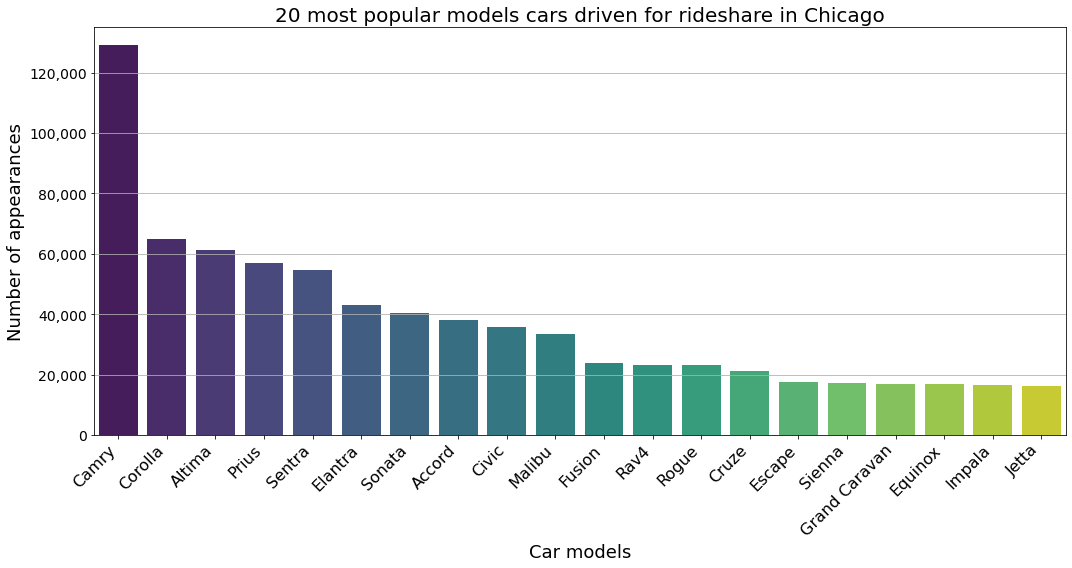

In [174]:
# graph for 20 most driven models

fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(data=bar_model, x='index', y='MODEL', palette='viridis')
ax.grid(axis='y')
plt.xticks(rotation=45, ha='right',fontsize=16)
plt.yticks(fontsize=14)
plt.ylabel('Number of appearances',fontsize=18)
plt.xlabel('Car models',fontsize=18)
plt.title('20 most popular models cars driven for rideshare in Chicago',fontsize=20)
plt.ylim(top=135000)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.savefig('../resources/popular_models',facecolor='white')

In [165]:
print(f"The mostly used model is {most_common_car} {most_common_model} = {amount_model}")

The mostly used model is Toyota Camry = 129143


In [183]:
prcnt_model=amount_model/total_cars*100
prcnt_model

9.374607555406826

In [54]:
# dataframe for the most common colors
colors_df=cars_pd['COLOR'].value_counts()
colors_df.head(30)

Black            445330
Silver           278646
White            203917
Gray             174165
Red               69468
Blue              62047
Dark Red          41250
Dark Blue         19929
Gold              15216
Tan               13862
Brown              7468
Green              7462
Burgundy           6022
Grey               5998
Light Blue         4170
"Black"            3491
Dark Grey          2301
Light Green        1733
Orange             1611
White/Pearl        1383
"                  1226
Beige               987
Purple              959
Yellow              914
Teal                633
"Grey"              601
Darkslategray       583
Dimgray             546
Midnightblue        454
Beige/Gold          441
Name: COLOR, dtype: int64

In [201]:
amount_color=colors_df.max()
percent_color=amount_color/total_cars*100

most_common_color=cars_pd['COLOR'].value_counts().idxmax()
print(f"The most common color is {most_common_color} with {percent_color} %")

The most common color is Black with 32.32690879605802 %


In [55]:
cars_pd['COLOR'] = cars_pd['COLOR'].replace(['0',' " ','#Name?','Other'],np.nan)
cars_df=cars_pd.dropna()

In [56]:
car_df=cars_df['COLOR'].value_counts()
color_df=car_df.head(12)
color_df

Black        445330
Silver       278646
White        203917
Gray         174165
Red           69468
Blue          62047
Dark Red      41250
Dark Blue     19929
Gold          15216
Tan           13862
Brown          7468
Green          7462
Name: COLOR, dtype: int64

In [57]:
# colors' list for the graph
my_colors = list(islice(cycle(['k', 'silver', 'w', 'gray', 'r','b','darkred','darkblue','goldenrod',
                               'navajowhite', 'brown','green']), None, len(color_df)))

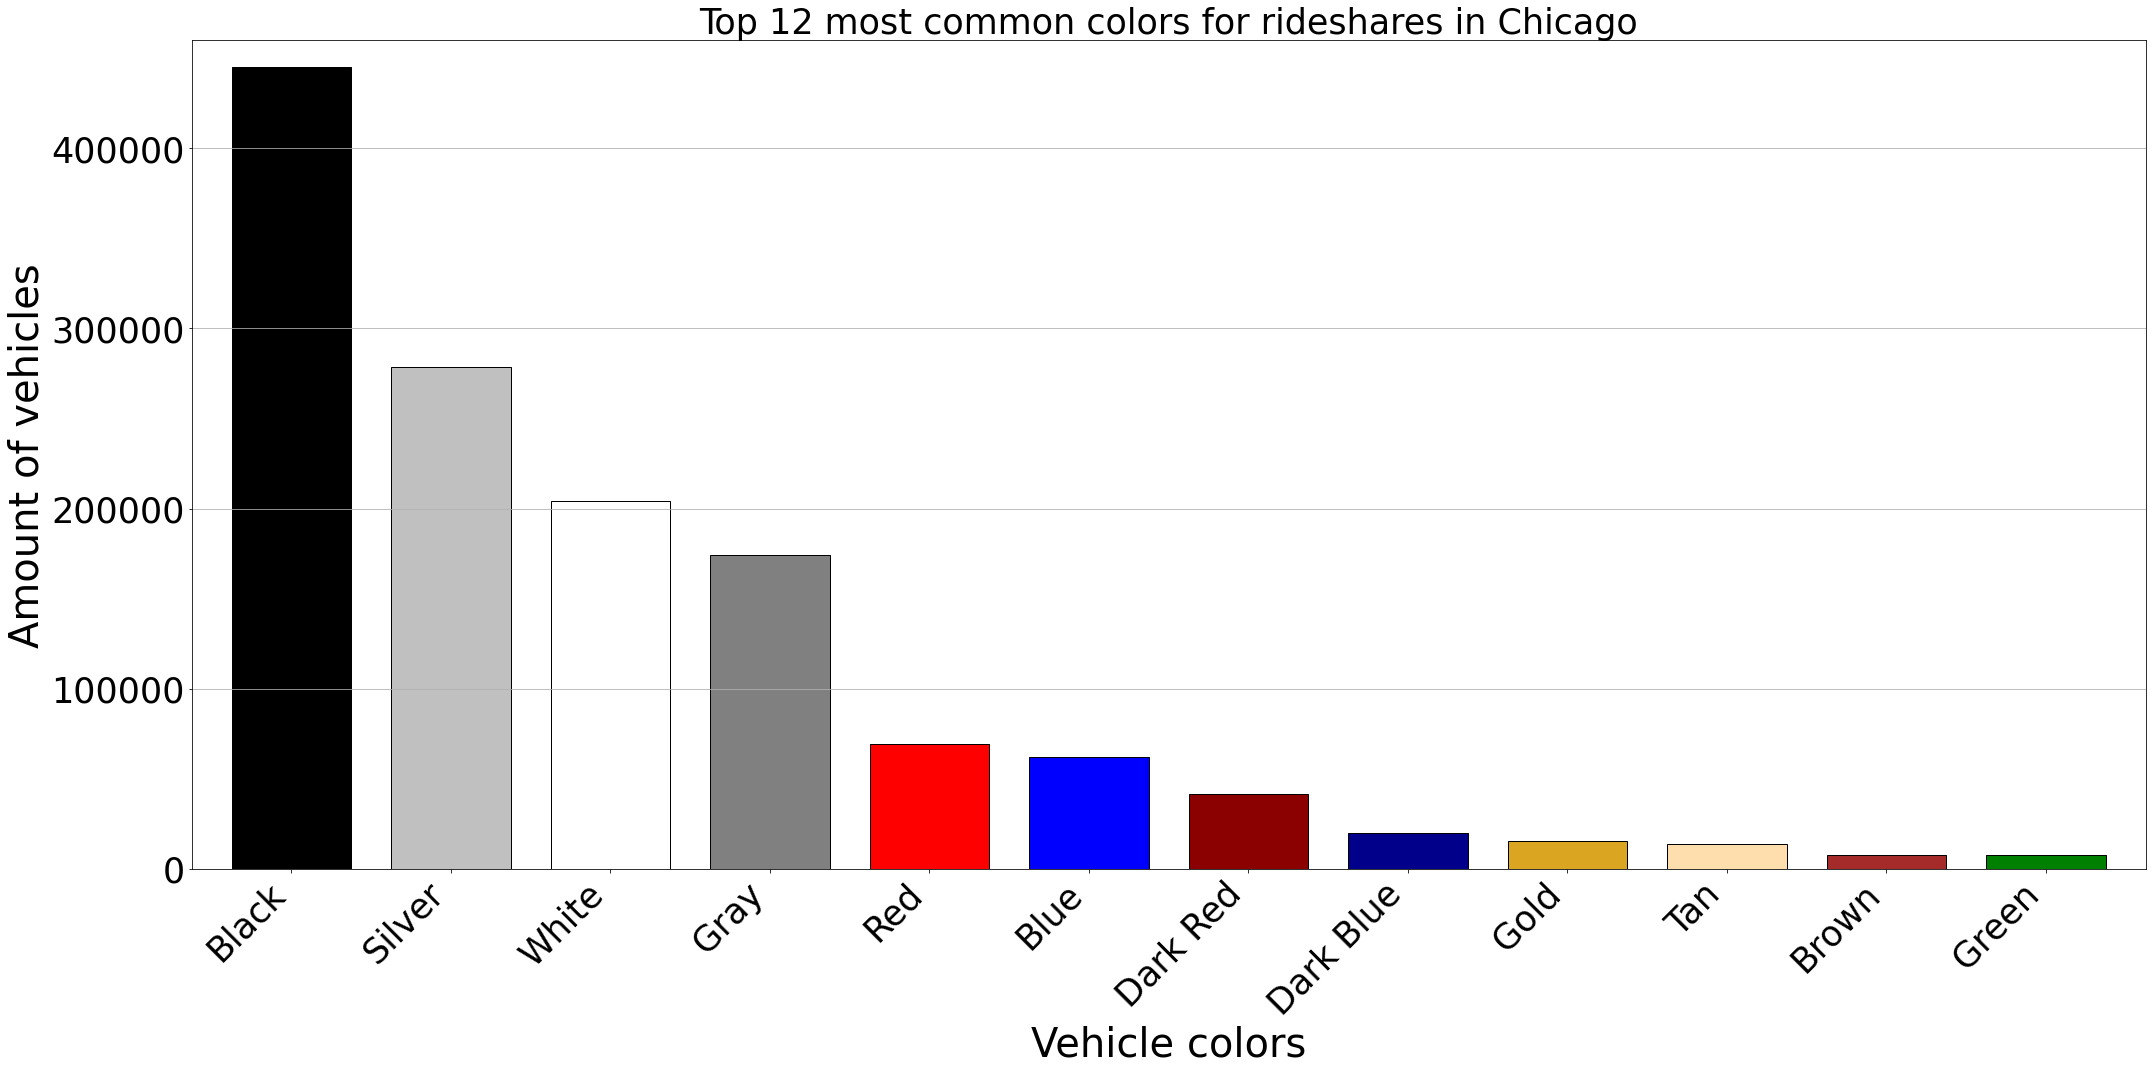

In [175]:
# graph for the colors
bar_chart=color_df.plot(kind='bar',stacked=True, color=my_colors,edgecolor='black',width=0.75, figsize=(30,15), fontsize=50)
bar_chart.set_xlabel("Vehicle colors", fontsize=40)
bar_chart.set_ylabel("Amount of vehicles", fontsize=40)
bar_chart.set_title("Top 12 most common colors for rideshares in Chicago", fontsize=35)
plt.xticks(rotation=45, ha='right', fontsize=35)
plt.yticks(fontsize=35)
plt.grid(axis='y')
plt.ylim(top=460000)
plt.tight_layout()
plt.savefig('../resources/colors.png',facecolor='white')

In [177]:
# creating a dataframe for drivers
driver_pd = pd.read_csv("../data/Driver_Data.csv")
driver_pd

C:\Users\kikof\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,MONTH_REPORTED,DRIVER_START_MONTH,CITY,STATE,ZIP,NUMBER_OF_TRIPS,MULTIPLE_TNPS
0,2019-09,2018-09,Hoffman Estates,IL,60169,7.0,True
1,2018-01,2017-02,Chicago,IL,60612,391.0,True
2,2018-01,2015-03,Dolton,IL,60419,371.0,True
3,2017-09,2017-07,Eilmette,IL,60091,251.0,False
4,2018-06,2018-02,Chicago,IL,60606,332.0,False
...,...,...,...,...,...,...,...
999994,2016-03,2015-10,NaN,IL,NaN,0.0,False
999995,2016-03,2015-10,NaN,IL,NaN,0.0,False
999996,2016-03,2015-10,NaN,IL,NaN,0.0,False
999997,2016-03,2015-10,NaN,IL,NaN,0.0,False


In [178]:
# cleaning the data
d_df=driver_pd.dropna()
d_df

,MONTH_REPORTED,DRIVER_START_MONTH,CITY,STATE,ZIP,NUMBER_OF_TRIPS,MULTIPLE_TNPS
0,2019-09,2018-09,Hoffman Estates,IL,60169,7.0,True
1,2018-01,2017-02,Chicago,IL,60612,391.0,True
2,2018-01,2015-03,Dolton,IL,60419,371.0,True
3,2017-09,2017-07,Eilmette,IL,60091,251.0,False
4,2018-06,2018-02,Chicago,IL,60606,332.0,False
...,...,...,...,...,...,...,...
997477,2016-04,2016-03,Lake Villa,IL,60046,0.0,False
997478,2016-06,2016-01,Schaumburg,IL,60173,16.0,False
997479,2018-01,2017-10,Hoffman Estates,IL,60169,17.0,False
997480,2016-05,2015-11,Crystal Lake,IL,60014,0.0,False


In [61]:
zip_df=d_df['ZIP'].value_counts()
z_df=zip_df.reset_index().head(20)

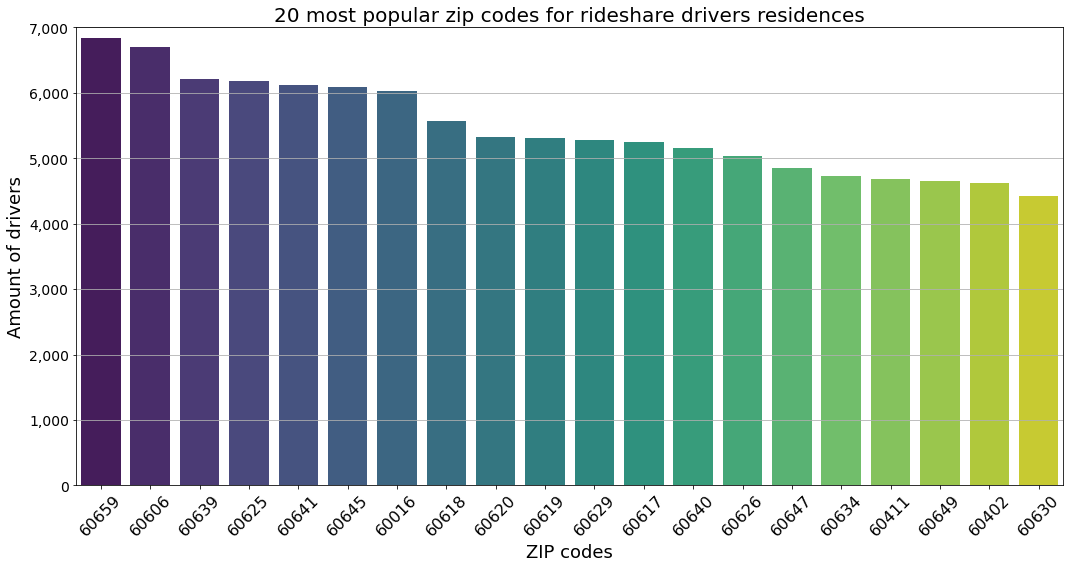

In [62]:
# bar_chart=z_df.plot(kind='bar',stacked=True, figsize=(50,20), fontsize=50)
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(data=z_df, x='index', y='ZIP', palette='viridis')
ax.grid(axis='y')
plt.xticks(rotation=45, ha='center',fontsize=16)
plt.yticks(fontsize=14)
plt.ylabel('Amount of drivers',fontsize=18)
plt.xlabel('ZIP codes',fontsize=18)
plt.title('20 most popular zip codes for rideshare drivers residences',fontsize=20)
plt.ylim(top=7000)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.savefig('../resources/20zip_codes',facecolor='white')

In [167]:
z_df=z_df.rename(columns ={'index':'zip', 'ZIP':'count'})

In [64]:
# adding latitude and logitude to the zip dataframe to create a heatmap
z_df['lat']=""
z_df['long']=""

In [127]:
# create a params dict that will be updated with new city each iteration
params = {"key": g_key}

# Loop through the z_df and run a lat/long search for each city
for index, row in z_df.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    zip = row['zip']
#     state = row['State']

    # update address key value with zip
    params['address'] = f"{zip}"

    # make request
    zip_lat_lng = requests.get(base_url, params=params)
    
    # convert to json
    zip_lat_lng = zip_lat_lng.json()

    z_df.loc[index, "lat"] = zip_lat_lng["results"][0]["geometry"]["location"]["lat"]
    z_df.loc[index, "long"] = zip_lat_lng["results"][0]["geometry"]["location"]["lng"]

# Visualize to confirm lat lng appear
z_df

,zip,count,lat,long
0,60659,6839,41.9909,-87.7025
1,60606,6704,41.8818,-87.6371
2,60639,6216,41.9225,-87.7517
3,60625,6178,41.9711,-87.7025
4,60641,6114,41.9472,-87.7468
5,60645,6088,42.0105,-87.6926
6,60016,6022,42.0489,-87.8844
7,60618,5566,41.9464,-87.7074
8,60620,5328,41.747,-87.668
9,60619,5316,41.7458,-87.6088


In [169]:
amount = z_df["count"].astype(float)
locations = z_df[["lat", "long"]]

In [170]:
# Plot Heatmap
fig = gmaps.figure(center=(41.9909,-87.7025),zoom_level=10)

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=amount, 
                                 dissipating=False, max_intensity=30000,
                                 point_radius=0.1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [171]:
# creating top 5 for markers over heatmap
top5_df=z_df.head(5)

In [172]:
info_box_template = """
<dl>
<dt>ZIP code</dt><dd>{zip}</dd>
<dt>Drivers</dt><dd>{count}</dd>
</dl>
"""
# Store the DataFrame Row
driver_info = [info_box_template.format(**row) for index, row in top5_df.iterrows()]
locations = top5_df[["lat", "long"]]

In [173]:
# Add marker layer ontop of heat map
# fig = gmaps.figure(center=(41.9909,-87.7025),zoom_level=11)
marker_layer=gmaps.marker_layer(locations, info_box_content=driver_info)
# Display figure
fig.add_layer(marker_layer)
fig

Figure(layout=FigureLayout(height='420px'))